In [1]:
import sys
import os

# Go two levels up from docs/source/ to reach the project root
# sys.path.insert(0, os.path.abspath('../../'))

import ionerdss as ion
import subprocess
from IPython.display import display, Image

Hetero 3mer

In [2]:
pdb_id = '8erq'
save_folder = '~/Documents/8erq_dir'

pdb_model = ion.PDBModel(pdb_id=pdb_id, save_dir=save_folder)

# set standard_output=True to see the determined interfaces
pdb_model.coarse_grain(distance_cutoff=0.35, 
                       residue_cutoff=3,
                       show_coarse_grained_structure=False, 
                       save_pymol_script=False, 
                       standard_output=True)

Successfully downloaded assembly file: /Users/sikao/Documents/8erq_dir/8erq-assembly1.cif.gz
Binding interfaces detected:
Chain A:
  Center of Mass (COM): (269.01806640625, 242.17724609375, 295.64739990234375)
  Interfaces: ['H', 'L']
  Interface Coordinates: 
    (268.3210144042969, 248.1563262939453, 316.8973388671875)
    Interface Energy: -0.62
    (262.9458312988281, 250.53515625, 312.5876770019531)
    Interface Energy: 0.35
Chain H:
  Center of Mass (COM): (266.20623779296875, 240.4397735595703, 332.46417236328125)
  Interfaces: ['A', 'L']
  Interface Coordinates: 
    (271.70751953125, 240.30325317382812, 320.6077575683594)
    Interface Energy: -0.62
    (258.14251708984375, 244.71109008789062, 327.66790771484375)
    Interface Energy: -17.71
Chain L:
  Center of Mass (COM): (248.6598663330078, 252.64096069335938, 327.45355224609375)
  Interfaces: ['A', 'H']
  Interface Coordinates: 
    (258.46173095703125, 253.8800048828125, 317.0842590332031)
    Interface Energy: 0.35
    

In [3]:
pdb_model.regularize_homologous_chains(dist_threshold_intra=3.5, 
                                       dist_threshold_inter=3.5, 
                                       angle_threshold=25.0, 
                                       show_coarse_grained_structure=False, 
                                       save_pymol_script=True, 
                                       standard_output=False)

Using original chain IDs as molecular types:
{'H': 'A', 'L': 'B', 'A': 'C'}
Homologous chain groups identified:
[['A'], ['H'], ['L']]
Regularized coarse-grained structure saved to /Users/sikao/Documents/8erq_dir/regularized_coarse_grained_structure.cif.
PyMOL script saved to /Users/sikao/Documents/8erq_dir/visualize_regularized_coarse_grained.pml.
Model saved successfully to /Users/sikao/Documents/8erq_dir/8erq_model.json


PyMOL>load /Users/sikao/Documents/8erq_dir/regularized_coarse_grained_structure.cif, coarse_grained
 ExecutiveLoad-Detail: Detected mmCIF
 CmdLoad: "/Users/sikao/Documents/8erq_dir/regularized_coarse_grained_structure.cif" loaded as "coarse_grained".
PyMOL>hide everything
PyMOL>show spheres, name COM
PyMOL>show spheres, name INT
PyMOL>set sphere_scale, 1.0
 Setting: sphere_scale set to 1.00000.
PyMOL>color red, name COM
 Executive: Colored 3 atoms.
PyMOL>color blue, name INT
 Executive: Colored 6 atoms.
PyMOL>pseudoatom com_A, pos=[269.018, 242.177, 295.647], color=red
 ObjMol: created com_A/PSDO/P/PSD`1 /PS1
PyMOL>pseudoatom int_A_1, pos=[268.321, 248.156, 316.897], color=blue
 ObjMol: created int_A_1/PSDO/P/PSD`1 /PS1
PyMOL>distance line1, com_A, int_A_1
 Executive: object "line1" created.
PyMOL>set dash_width, 4, line1
 Setting: dash_width set to 4.00000 in object "line1".
PyMOL>set dash_gap, 0.5, line1
 Setting: dash_gap set to 0.50000 in object "line1".
PyMOL>pseudoatom int_A_2, p

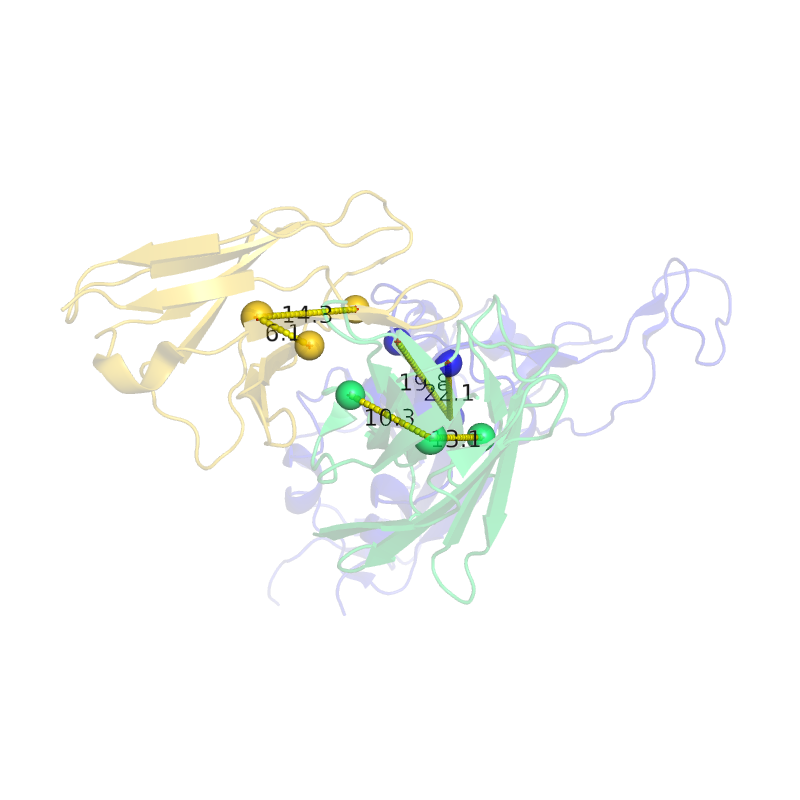

In [4]:
if save_folder.startswith('~'):
    abs_save_folder = os.path.expanduser(save_folder)
abs_save_folder = os.path.abspath(abs_save_folder)

subprocess.run(["pymol", "-cq", f"{abs_save_folder}/visualize_regularized_coarse_grained.pml"], check=True)
display(Image(filename=f"{abs_save_folder}/comparison_regularized.png"))